In [1]:
from time import time
from itertools import zip_longest

#Third Party Library
from wallstreet import Stock, Call, Put
from yahoo_fin import options
from get_all_tickers import get_tickers as gt
from get_all_tickers.get_tickers import Region

In [2]:
def grouper(iterable, n, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    # grouper('ABCDEFG', 3, 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

In [3]:
def infos( udlying,day,month,year,stockprice, offset):
    """
    Group information

    :param udlying: underlying stock object
    :param day: int digits
    :param month: int digits
    :param year:
    :param stockprice: stock price
    :param offset: strike offset
    :return: Tuple of all data
    """
    u = Call(udlying, d=day, m=month, y=year, strike=stockprice+offset)
    price = u.price
    IV = u.implied_volatility()
    v = u.vega()
    g = u.gamma()
    strike = u.strike
    return (IV,v,g,price,strike)

def moves(DTern,DTE,IV,IVn,v,g,price_move,offset):
    """
    Calculte IV_AE, Vega Change, Gamma Change
    :param DTern:
    :param DTE:
    :param IV:
    :param IVn:
    :param v:
    :param g:
    :param price_move:
    :param offset:
    :return: Tuple of the IV_AE, Vega Change, Gamma Change
    """
    IV_AE = ((DTern/(DTern+DTE))*IV**2 + (DTE/(DTern+DTE))*IVn**2)**0.5
    vega_change = v*(IV_AE-IV)*100
    gamma_change = 0.5*g*(price_move+offset)**2
    return (IV_AE,vega_change,gamma_change)

In [4]:
optionable_list=[]
def find_optionable_stocks(udlying):
    """
    Check if the ticker is expired and add it to Global optional list
    :param udlying:  Input Ticket
    :return:  None
    """
    global optionable_list

    g = options.get_expiration_dates(udlying)
    if len(g):
        print(udlying)
        optionable_list.append(udlying)

In [5]:
## async libary
import asyncio
async def find_optoinable_stocks_async(udlying):
    """
    Async verion of find_optionable_stocks
    Check if the ticker is expired and add it to Global optional list
    :param udlying: Input tickets
    :return: None
    """
    global optionable_list

    g = options.get_expiration_dates(udlying)
    if g:
        print(udlying)
        optionable_list.append(udlying)

async def find_all_optoinable_stocks_async(udlyings):
    """
    Get all stocks from names
    :param udlyings: list of stock name
    :return:  Nome
    """
    tasks = []
    for stock in udlyings:
        task = asyncio.ensure_future(find_optoinable_stocks_async(stock))
        tasks.append(task)
    await asyncio.gather(*tasks,return_exceptions=False)


# def find_optionable_stocks(udlying):
#     g = Put(udlying).expirations
#     if len(g) != 0:
#         optionable_list.append(udlying)

In [6]:
##Multiprocessing Libary
import multiprocessing

def find_all_optoinable_stocks_multiprocess(udlyings):
    with multiprocessing.Pool() as pool:
        pool.map(find_optionable_stocks,udlyings)


In [7]:
list_of_tickers = gt.get_tickers_by_region(Region.NORTH_AMERICA)
print(list_of_tickers[3])
print(len(list_of_tickers))

max_price = 200
min_price = 50
num_stocks = 10
#optionable_list = find_optionable_stocks(list_of_tickers, num_stock)

YQ
4003


In [8]:
## Threading
import concurrent.futures
import threading

optionable_list = list()

start = time()
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    executor.map(find_optionable_stocks,list_of_tickers[1:10])
    # for udlying in list_of_tickers[1:100]:
    #     processes.append(executor.submit(find_optionable_stocks, udlying))

# for ticker in list_of_tickers[1:10]:
#     find_optionable_stocks(ticker)

print(optionable_list)
print(f'Time taken: {time() - start}')


TURN
TXG
FLWS
ONEM
['TURN', 'TXG', 'FLWS', 'ONEM']
Time taken: 6.483306884765625


In [9]:
## Asyncio
import nest_asyncio
nest_asyncio.apply()
optionable_list = list()

start = time()

asyncio.get_event_loop().run_until_complete(find_all_optoinable_stocks_async(list_of_tickers[1:10]))


print(optionable_list)
print(f'Time taken: {time() - start}')

TXG
TURN
FLWS
ONEM
['TXG', 'TURN', 'FLWS', 'ONEM']
Time taken: 23.05554509162903


In [10]:
#multiprocessing
optionable_list = list()

start = time()
find_all_optoinable_stocks_multiprocess(list_of_tickers[1:10])

print(optionable_list)
print(f'Time taken: {time() - start}')

TURN
FLWS
TXG
ONEM
[]
Time taken: 5.59160304069519


In [17]:
import matplotlib.pyplot as plt
import numpy as np

#Benchmark
thread_results = list()
async_reuslts = list()
multiprocessing_results = list()

# Test a function for 1, 10,20
for n in (1,10,20):

    ## threading
    start = time()
    optionable_list = list()
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        executor.map(find_optionable_stocks,list_of_tickers[1:n+1])
    thread_results.append((n,time() - start))

    ##aync
    start = time()
    optionable_list = list()
    asyncio.get_event_loop().run_until_complete(find_all_optoinable_stocks_async(list_of_tickers[1:n+1]))
    async_reuslts.append((n,time() - start))

    ##multiprocessing
    start = time()
    optionable_list = list()
    find_all_optoinable_stocks_multiprocess(list_of_tickers[1:n+1])
    multiprocessing_results.append((n,time()-start))

TXG
TXG
TXG
TXG
TURN
ONEM
FLWS
TXG
TURN
FLWS
ONEM
FLWSTXG

TURNONEM

TURN
TXG
FLWS
ONEM
TWOU
QFIN
VNET
SRCE
ETNB
JOBS
TXG
TURN
FLWS
ONEM
SRCE
VNET
TWOU
QFIN
JOBS
ETNB
ONEM
TXG
TURN
SRCE
FLWS
TWOUVNET

QFIN
JOBS
ETNB


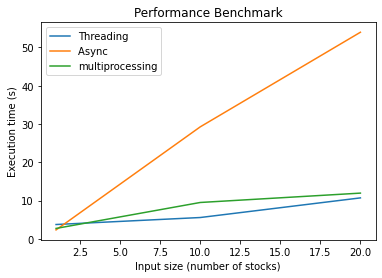

In [18]:
##Plot timing results.
plt.title('Performance Benchmark')
plt.xlabel('Input size (number of stocks)')
# plt.xticks(range(1, 3 + 1))
plt.ylabel('Execution time (s)')
plt.plot(*zip(*thread_results), label='Threading')
plt.plot(*zip(*async_reuslts), label='Async ')
plt.plot(*zip(*multiprocessing_results), label='multiprocessing')
plt.legend()
plt.show()

In [19]:
thread_results

[(1, 3.7330400943756104), (10, 5.560855150222778), (20, 10.688799142837524)]

In [20]:
async_reuslts

[(1, 2.322359800338745), (10, 29.243816137313843), (20, 53.96411895751953)]

In [21]:
multiprocessing_results

[(1, 2.711322069168091), (10, 9.489286184310913), (20, 11.935796976089478)]